# Testing Normality

We take sample drawn from normal distribution and from bimodal distribution and try different methods to determine their normality.

Ressources: 
- https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9
- http://scientificpythonsnippets.com/index.php/2-uncategorised/6-q-q-plot-in-python-to-test-if-data-is-normally-distributed
- https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import numpy.random as random
random.seed(1)

import statsmodels.api as sm
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy import exp
#import pylab

### Create the different samples 

In [2]:
# Create the random variables normally distributed with mean 5, and sd 3                                
x_10 = random.normal(loc=5, scale=3, size=10)
x_50 = random.normal(loc=5, scale=3, size=50)
x_1000 = random.normal(loc=5, scale=3, size=1000)
x_10000 = random.normal(loc=5, scale=3, size=10000)
norm_samples = [x_10, x_50, x_1000, x_10000]

In [3]:
b_10 = np.concatenate((random.normal(loc=1, scale=1, size=10), random.normal(loc=8, scale=2, size=10)))
b_50 = np.concatenate((random.normal(loc=1, scale=1, size=50), random.normal(loc=8, scale=2, size=50)))
b_1000 = np.concatenate((random.normal(loc=1, scale=1, size=1000), random.normal(loc=8, scale=2, size=1000)))
b_10000 = np.concatenate((random.normal(loc=1, scale=1, size=10000), random.normal(loc=8, scale=2, size=10000)))
bimod_samples = [b_10, b_50, b_1000, b_10000]

# Histograms 

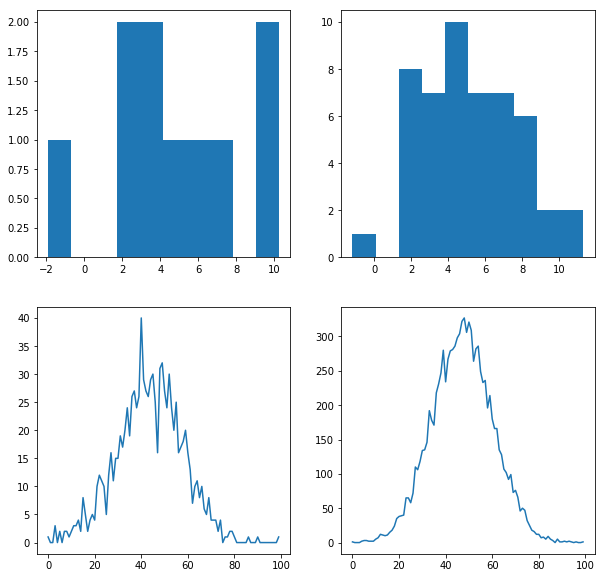

In [4]:
# Plot the histograms of the normal samples.                                         
fig, ax= plt.subplots(2,2, figsize=(10,10))
ax[0, 0].hist(x_10)
ax[0, 1].hist(x_50)

# For bigger sample size we plot the histograms manually to be able to change the bins number.
xh_1000 = np.histogram(x_1000, bins=100)[0]
xh_10000 = np.histogram(x_10000, bins=100)[0]
ax[1, 0].plot(xh_1000)
ax[1, 1].plot(xh_10000)


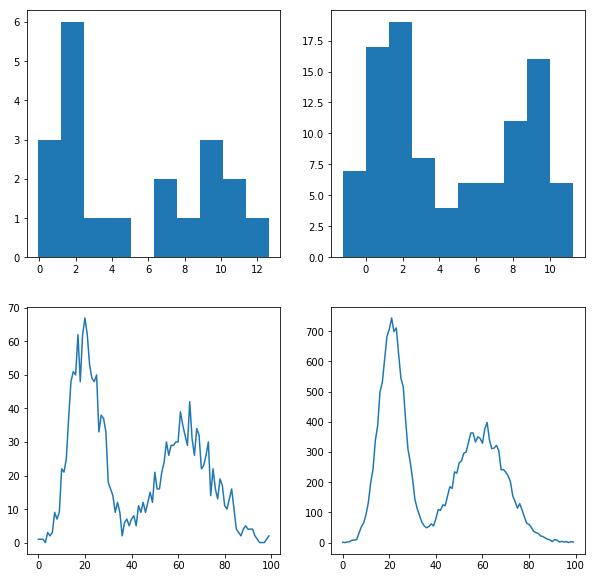

In [5]:
# Plot the histograms of the bimodal samples.                                        
fig, ax= plt.subplots(2, 2, figsize=(10,10))
ax[0, 0].hist(b_10)
ax[0, 1].hist(b_50)

# For bigger sample size we plot the histograms manually to be able to change the bins number.
bh_1000 = np.histogram(b_1000, bins=100)[0]
bh_10000 = np.histogram(b_10000, bins=100)[0]
ax[1, 0].plot(bh_1000)
ax[1, 1].plot(bh_10000)

# Goodness of a normal fit.

In [6]:
def gauss(x, a, x0, sigma):
    return a * exp(-(x - x0)**2 / (2 * sigma**2))

def fit_gaussian(signal, bins=None):
    if bins == None:
        bins = max(10, int(np.sqrt(len(signal))))
    signal_distrib = np.histogram(signal, bins=bins)
    x = signal_distrib[1][:-1]
    y = signal_distrib[0]

    signal_mean = signal.mean()
    signal_std = signal.std()
    gauss_signal = lambda x, a: gauss(x, a, signal_mean, signal_std)
    popt, pcov = curve_fit(gauss_signal, x, y)
    #popt, pcov = curve_fit(gauss, x, y, p0=[1, signal_mean, signal_std])
    
    fit_y = gauss_signal(x, *popt)
    # fit_y = gauss(x, *popt)
    
    err = ((y - fit_y)**2).sum() / len(y)
    
    return popt, pcov, x, y, fit_y, err

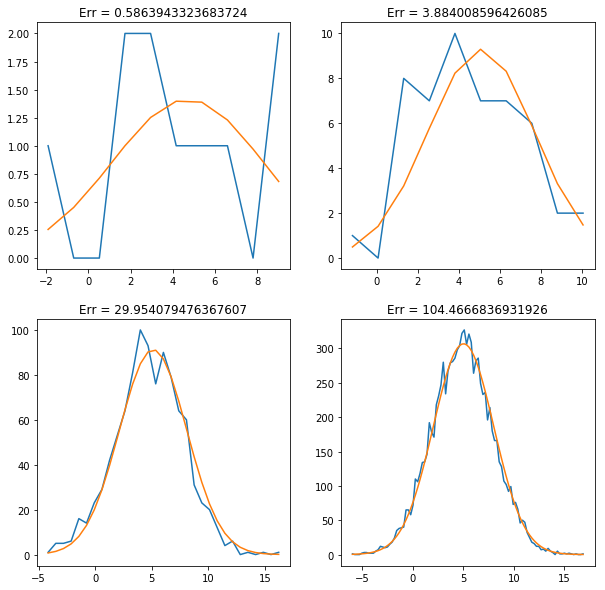

In [7]:
fig, ax= plt.subplots(2, 2, figsize=(10,10))
i = 0
ax = ax.ravel()
for i, fig in enumerate(ax):
    popt, pcov, x, y, yest, err = fit_gaussian(norm_samples[i])
    fig.plot(x, y)
    fig.plot(x, yest)
    fig.set_title(f'Err = {err}')
        

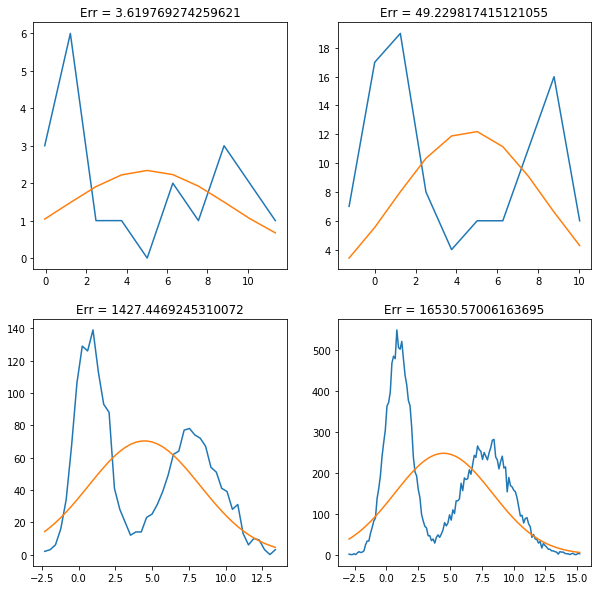

In [8]:
fig, ax= plt.subplots(2, 2, figsize=(10,10))
i = 0
ax = ax.ravel()
for i, fig in enumerate(ax):
    popt, pcov, x, y, yest, err = fit_gaussian(bimod_samples[i])
    fig.plot(x, y)
    fig.plot(x, yest)
    fig.set_title(f'Err = {err}')
        

Pretty intuitive but 
- Does not seem to work very well on small samples
- The error scale depends on the sample size 

# Statistical Test

## $H_{0}$: The sample is drawn from Normal Distribution

### Shapiro-Wilk

"The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer."

Note:  A Shapiro Wilk test, at least if you base a decision on a p-value, is sample size dependent. With a small sample, you'll almost always conclude "normal" and with a large enough sample, even a tiny deviation from normal will be significant




In [9]:
# Print the p values for normal samples.
for sample in norm_samples:
    print(stats.shapiro(sample))

(0.9563897252082825, 0.7440548539161682)
(0.9823840260505676, 0.6559045314788818)
(0.9979423880577087, 0.2593482434749603)
(0.9998509883880615, 0.7878420352935791)


/home/marius/miniconda3/envs/stats/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
# Print the p values for bimodal samples.                                                             
for sample in bimod_samples:
    print(stats.shapiro(sample))

(0.8855003714561462, 0.022249076515436172)
(0.9050363302230835, 2.4581859179306775e-06)
(0.9104732275009155, 8.785146662314616e-33)
(0.9104382395744324, 0.0)


/home/marius/miniconda3/envs/stats/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Kolmogorov-Smirnov

In [11]:
# Print the p values for normal samples.
for sample in norm_samples:
    print(stats.kstest(sample, 'norm', args=(sample.mean(), sample.std())))

KstestResult(statistic=0.15085722340895358, pvalue=0.9767606717783548)
KstestResult(statistic=0.08016997268363846, pvalue=0.9048642594755014)
KstestResult(statistic=0.0196521018923399, pvalue=0.8346657544771993)
KstestResult(statistic=0.005125066609611206, pvalue=0.9553773446196092)


In [12]:
# Print the p values for bimodal samples.                                                             
for sample in bimod_samples:
    print(stats.kstest(sample, 'norm', args=(sample.mean(), sample.std())))

KstestResult(statistic=0.2317341290798603, pvalue=0.19930510916366623)
KstestResult(statistic=0.15836659884883902, pvalue=0.011723388958568668)
KstestResult(statistic=0.1659242464047574, pvalue=1.3645845884543386e-48)
KstestResult(statistic=0.16964959827126352, pvalue=0.0)


### Anderson-Darling

In [13]:
# Print the p values for normal samples.
for sample in norm_samples:
    print(stats.anderson(sample, dist='norm'))

AndersonResult(statistic=0.24844826962238287, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.3329254625113336, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.43703103881625793, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.25870002136616677, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [14]:
# Print the p values for bimodal samples.                                                             
for sample in bimod_samples:
    print(stats.anderson(sample, dist='norm'))

AndersonResult(statistic=0.9738271959474005, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=3.714385314619676, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=74.49826986969174, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=756.6129722134356, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


On these samples:
- Kolmogorov-Smirnov seems to be the only one that is mistaken (for small bimodal sample and alpha = 5%)

# Q-Q plots

Advantage of this method compared to goodness of normal fit is that one does not have ot estimate the distribution (draw an histogram/KDE) of the data with QQ plot

### For Normal distrib

In [15]:
def compute_R2(y, yest):
    R2 = 1 - ((yest - y)**2).sum() / ((y - y.mean())**2).sum()
    return R2

In [16]:
def QQ(sample, std=None, mean=None):
    """ QQ plot of the sample.
    If None of mean and std are specified, they are estimated from the sample.
    """
    ls = len(sample)
    if std == None:
        std = np.std(sample)
    if mean == None:
        mean = np.mean(sample)
    # Generating normal Distribution.
    norm_dis = random.normal(mean, std, ls)
    # Ordering sample and normal distribution.
    sample.sort()
    norm_dis.sort()
    # Fitting linear regression and computing R^2
    coeffs = np.polyfit(norm_dis,sample, 1)
    f = np.poly1d(coeffs)
    sample_est = f(norm_dis)
    R2 = compute_R2(sample, sample_est)
    #print(R2)
    
    # Plotting sample against normal.
    #plt.plot(norm_dis, sample, "o")
    #plt.plot(norm_dis, sample_est,"k--", linewidth=2)
    #plt.title("Normal Q-Q plot", size=28)
    #plt.xlabel("Theoretical quantiles", size=24)
    #plt.ylabel("Expreimental quantiles", size=24)
    #plt.tick_params(labelsize=16)
    #plt.show()
    return norm_dis, sample, sample_est, R2

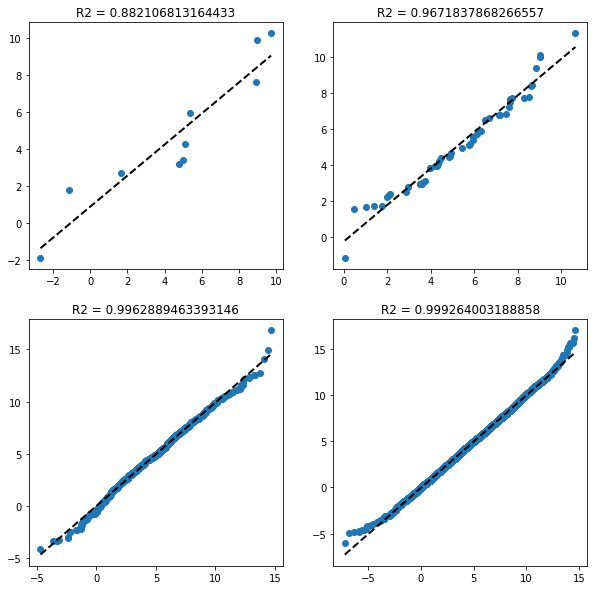

In [17]:
fig, ax= plt.subplots(2,2, figsize=(10,10))

ax = ax.ravel()

for i, fig in enumerate(ax):
    norm, sample, line, R2 = QQ(norm_samples[i])
    fig.plot(norm, sample, "o")
    fig.plot(norm, line, "k--", linewidth=2)
    fig.set_title(f'R2 = {R2}')

### For bi-modal distrib

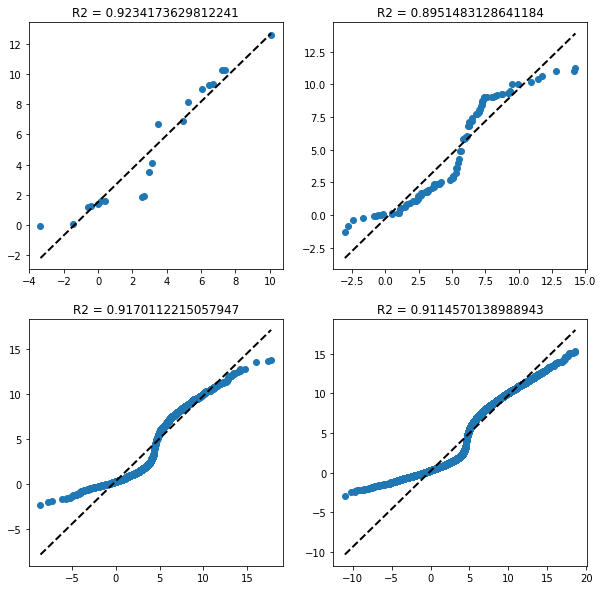

In [18]:
fig, ax= plt.subplots(2,2, figsize=(10,10))

ax = ax.ravel()

for i, fig in enumerate(ax):
    norm, sample, line, R2 = QQ(bimod_samples[i])
    fig.plot(norm, sample, "o")
    fig.plot(norm, line, "k--", linewidth=2)
    fig.set_title(f'R2 = {R2}')

Note: The normal sample of the QQ plot (the one we are comparing our distribution with) should be an average of various samples drawn from normal distribution. If it is the case, then the R2 coefficient of the QQ plot is called Shapiro-Francia statistics.